In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
train = pd.read_csv('titanic_train.csv')

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


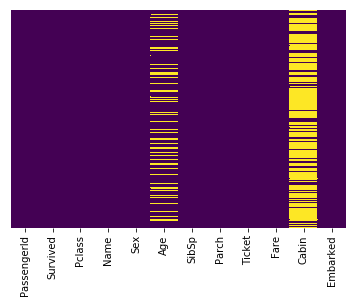

In [30]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap='viridis')

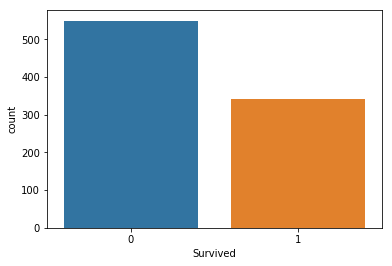

In [33]:
sns.countplot(train['Survived'],data=train)

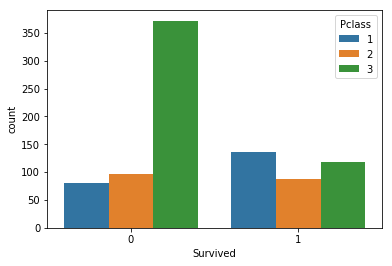

In [34]:
sns.countplot(train['Survived'],hue=train['Pclass'])

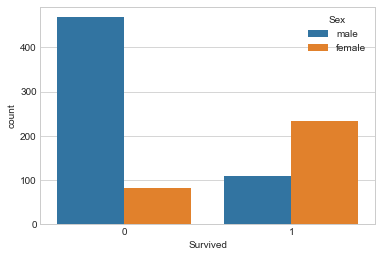

In [42]:
sns.set_style('whitegrid')
sns.countplot(train['Survived'],hue=train['Sex'])

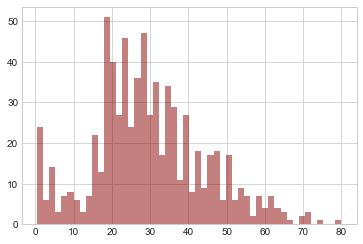

In [50]:
train['Age'].hist(bins=50,color='darkred',alpha=0.5)

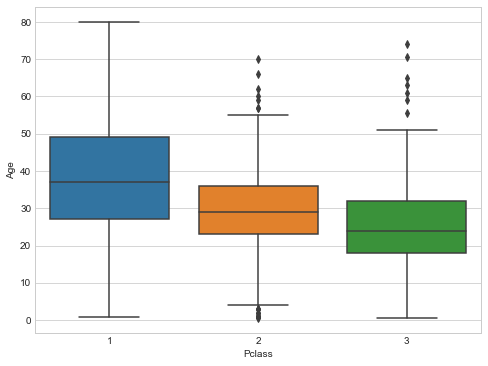

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [63]:
def age(para):
    Age=para[0]
    Pclass=para[1]
    if pd.isnull(Age):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 28
        else:
            return 24
    else:
        return Age

In [68]:
train['Age'] = train[['Age','Pclass']].apply(age,axis=1)

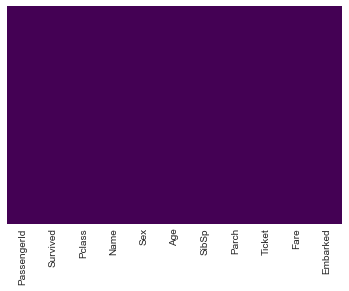

In [73]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [70]:
train.drop('Cabin',axis=1,inplace=True)

In [72]:
train.dropna(inplace=True)

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null int64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


In [75]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


In [82]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [84]:
train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [85]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24,1,0,7.2500
1,2,1,1,37,1,0,71.2833
2,3,1,3,24,0,0,7.9250
3,4,1,1,37,1,0,53.1000
4,5,0,3,24,0,0,8.0500


In [86]:
train = pd.concat([train,sex,embark],axis=1)

In [87]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,37,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,37,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = train.drop('Survived',axis=1)
y  = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
logmodel = LogisticRegression()

In [92]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
pred = logmodel.predict(X_test)

In [94]:
from sklearn.metrics import confusion_matrix,classification_report

In [95]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267

